In [4]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.datasets import make_moons

from location_allocation import MaximizeCoverageMinimizeFacilities
import utils

### Generate Dummy Data & Optimize

In [5]:
points, _ = make_moons(300, noise=0.15)
facilities = utils.generate_candidate_facilities(points, 50)
capacities = utils.generate_facility_capacities(facilities.shape[0])

dist_matrix = distance_matrix(points, facilities)

mcmflp = MaximizeCoverageMinimizeFacilities(
    points, facilities, dist_matrix, dist_cutoff=0.2, max_gap=0.1
)
mcmflp.optimize()

Cgl0002I 14731 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 89 strengthened rows, 2 substitutions
Cgl0004I processed model has 308 rows, 615 columns (615 integer (615 of which binary)) and 1365 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 0.145%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc0045I MIPStart provided solution with cost 90
Cbc0012I Integer solution of 90 found by Reduced search after 0 iterations and 0 nodes (0.15 seconds)
Cbc0012I Integer solution of -2 found by DiveCoefficient after 0 iterations and 0 nodes (0.16 seconds)
Cbc0038I Full problem 308 rows 615 columns, reduced to 1 rows 2 columns
Cbc0012I Integer solution of -25 found by DiveCoefficient after 165 iterations and 0 nodes (0.22 seconds)
Cbc0031I 34 added rows had average density of 14.764706
Cbc0013I At root node, 34 cuts changed objective from -29.575092 to -25 in 6 passes
Cbc0014I Cut generator 0 (Probing) - 165 row cuts average 2.3 elements, 0 column cut

### Plot Result

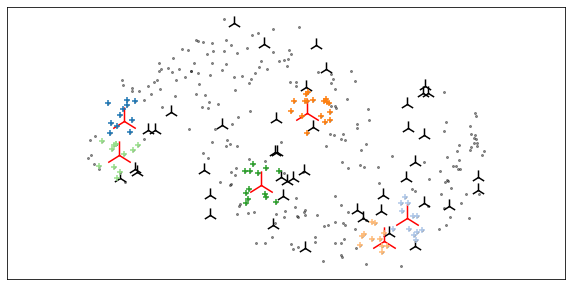

In [6]:
opt_facilities_indices = list(mcmflp.result.solution.keys())
opt_facilities = facilities[opt_facilities_indices]
other_facilities = np.delete(facilities, [opt_facilities_indices], axis=0)

utils.plot_result(points, mcmflp.result.solution, opt_facilities, other_facilities)